# Linear Regression on California Housing Dataset

This notebook demonstrates an using the California Housing Dataset.

**Key Steps:**
1. Data Loading and Exploration
2. Data Preprocessing
3. Train-Test Split
4. Model Training
5. Evaluation
6. Visualization


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## 1️⃣ Load Dataset

In [20]:
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 2️⃣ Explore Data

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [22]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## 3️⃣ Correlation Heatmap

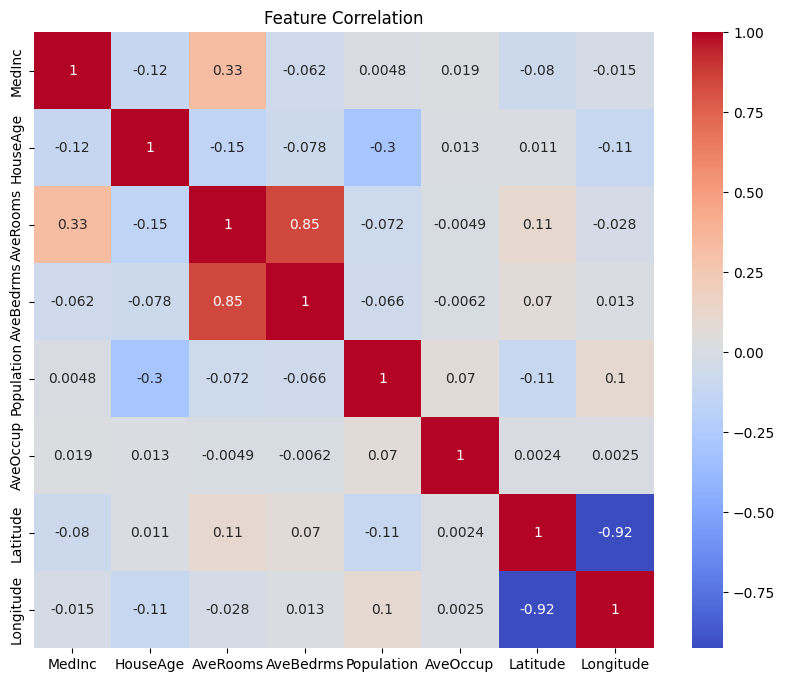

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

## 4️⃣ Train-Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training samples:', X_train.shape[0])
print('Testing samples:', X_test.shape[0])

Training samples: 16512
Testing samples: 4128


## 5️⃣ Feature Scaling

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6️⃣ Train Linear Regression Model

In [26]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

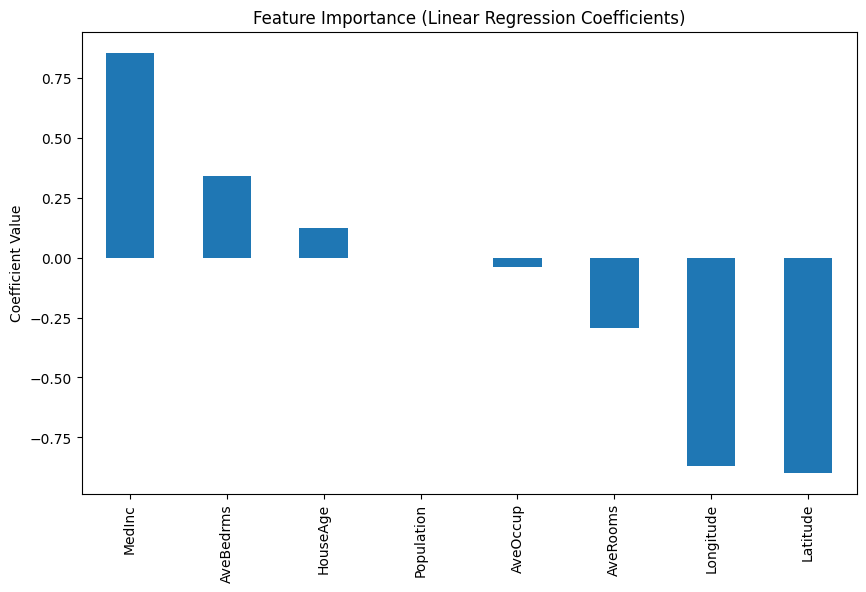

In [30]:
importance = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importance.plot(kind='bar')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.show()

## 7️⃣ Evaluate Model

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Mean Squared Error (MSE): 0.5558915986952442
R-squared (R2) Score: 0.575787706032451


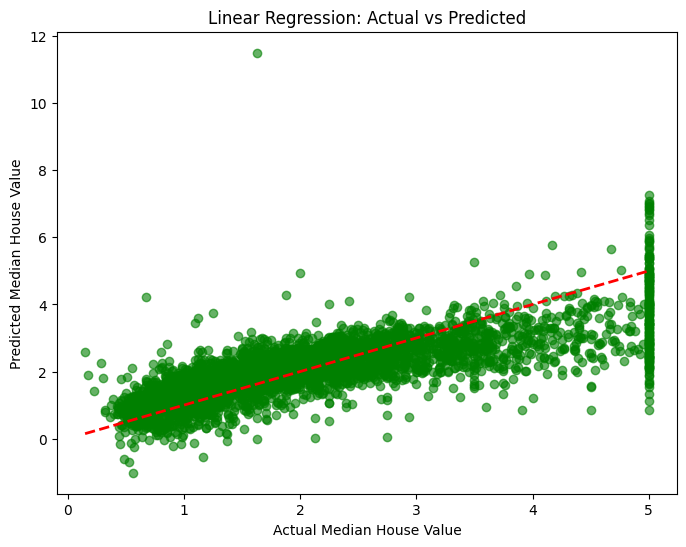

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

## 8️⃣ Visualize Predictions

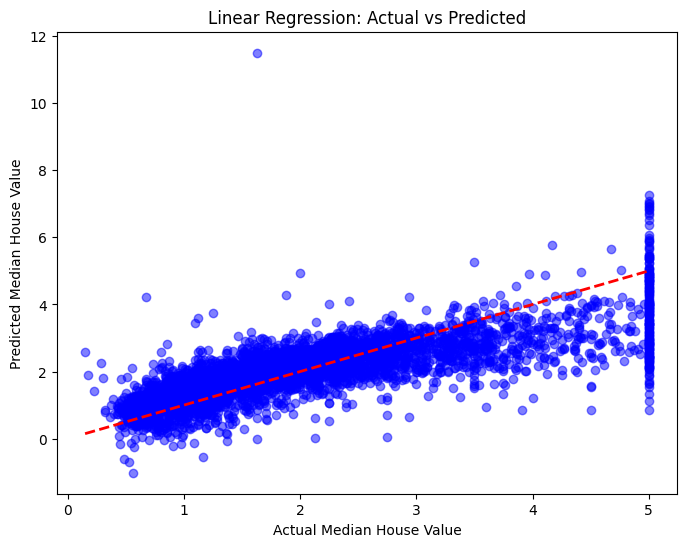

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

## ✅ Summary

- Successfully trained a Linear Regression model on **California Housing Dataset**.
- Applied **feature scaling** for better model performance.
- Evaluated using **MSE** and **R2 Score**.
- Visualized predictions vs actual values.